In [1]:
import pandas as pd

from pyextremes import __version__, get_extremes
from pyextremes.plotting import plot_extremes
print("pyextremes", __version__)

pyextremes 2.2.3


# Load Data

In [2]:
data = pd.read_csv(
    "../../../data/battery_wl.csv",
    index_col=0,
    parse_dates=True,
    squeeze=True,
)
data = (
    data
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
)
data = data.loc[pd.to_datetime("1980/01/01"):pd.to_datetime("1980/01/20")]
data = data - (data.index.array - pd.to_datetime("1992")) / pd.to_timedelta("365.2425D") * 2.87e-3

# High Extremes
## 12H Inter-Cluster Distance

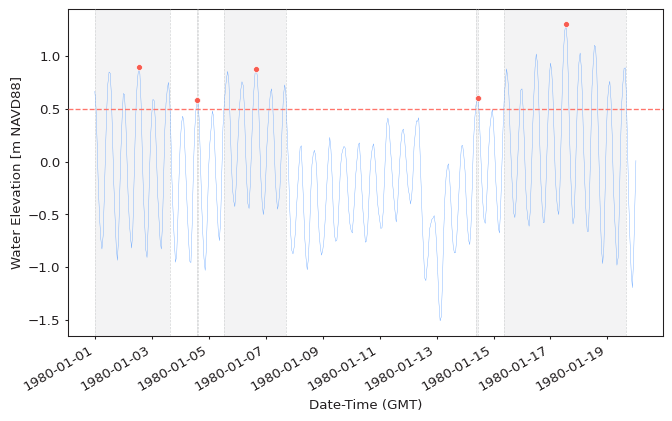

In [3]:
threshold = 0.5
r = "12H"
extremes = get_extremes(
    ts=data,
    method="POT",
    threshold=threshold,
    r=r,
)
fig, ax = plot_extremes(
    ts=data,
    extremes=extremes,
    extremes_method="POT",
    extremes_type="high",
    threshold=threshold,
    r=r,
    figsize=(8, 5),
)
fig.autofmt_xdate()
fig.savefig("pot-high-12H.png", dpi=96, bbox_inches="tight")

## 24H Inter-Cluster Distance

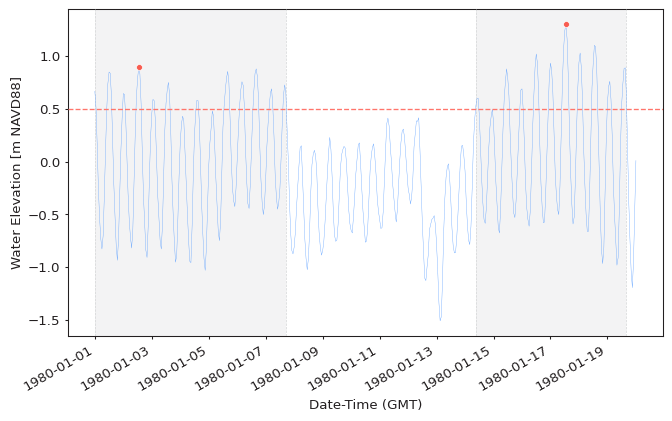

In [4]:
threshold = 0.5
r = "24H"
extremes = get_extremes(
    ts=data,
    method="POT",
    threshold=threshold,
    r=r,
)
fig, ax = plot_extremes(
    ts=data,
    extremes=extremes,
    extremes_method="POT",
    extremes_type="high",
    threshold=threshold,
    r=r,
    figsize=(8, 5),
)
fig.autofmt_xdate()
fig.savefig("pot-high-24H.png", dpi=96, bbox_inches="tight")

# Low Extremes

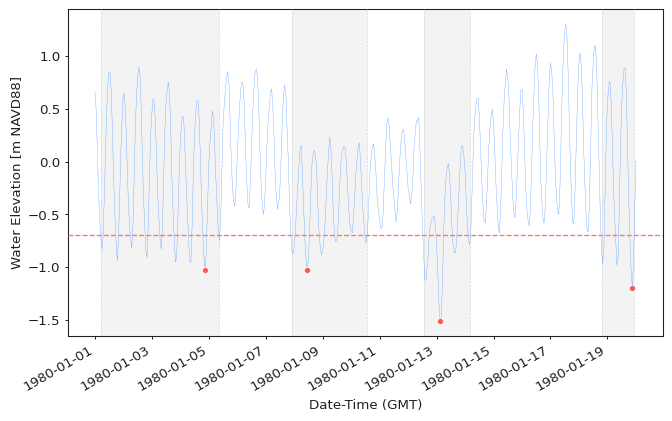

In [5]:
threshold = -0.7
r = "24H"
extremes = get_extremes(
    ts=data,
    method="POT",
    extremes_type="low",
    threshold=threshold,
    r=r,
)
fig, ax = plot_extremes(
    ts=data,
    extremes=extremes,
    extremes_method="POT",
    extremes_type="low",
    threshold=threshold,
    r=r,
    figsize=(8, 5),
)
fig.autofmt_xdate()
fig.savefig("pot-low.png", dpi=96, bbox_inches="tight")